<a href="https://colab.research.google.com/github/dgiri4132/CAPM-Portfolio-Analysis/blob/main/CAPM_vs_Actual_Return_myPort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter how many stocks you want: 2
Enter the symbol:1 aapl
Enter the symbol:2 amzn
Enter the start date: 2023-01-01
Enter the end date: 2024-01-01


[*********************100%***********************]  3 of 3 completed

  Stock   Alpha    Beta  Actual Return  CAPM Return  Real Alpha
0  AAPL  0.0008  1.1045         0.0018        0.001      0.0008
  Stock   Alpha    Beta  Actual Return  CAPM Return  Real Alpha
0  AAPL  0.0008  1.1045         0.0018       0.0010      0.0008
1  AMZN  0.0011  1.5388         0.0025       0.0014      0.0011


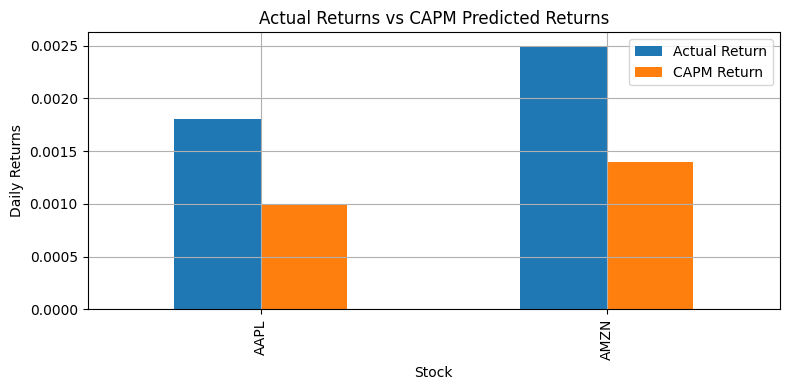

In [ ]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
tickers=[]
n=int(input('Enter how many stocks you want: '))
for i in range(n):
  symbol=input(f'Enter the symbol:{i+1} ').upper().strip()
  tickers.append(symbol)
tickers.append('^GSPC')
start_date=input('Enter the start date: ')
end_date=input('Enter the end date: ')
data=yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close'].dropna()
returns=data.pct_change().dropna()
market_returns=returns['^GSPC']
results=[]
risk_free_rate=0.02/252
expected_market_returns=market_returns.mean()
for stock in tickers:
  if stock=='^GSPC':
    continue
  stock_returns=returns[stock]
  actual_returns=stock_returns.mean()
  X=sm.add_constant(market_returns)
  model=sm.OLS(stock_returns,X).fit()
  alpha=model.params['const']
  beta=model.params['^GSPC']
  CAPM_return=risk_free_rate+beta*(expected_market_returns-risk_free_rate)
  real_alpha=actual_returns-CAPM_return
  results.append({'Stock':stock,'Alpha':round(alpha,4),'Beta':round(beta,4),'Actual Return':round(actual_returns,4),'CAPM Return':round(CAPM_return,4),'Real Alpha':round(real_alpha,4)})
  results_df=pd.DataFrame(results)
  print(results_df)
results_df.set_index('Stock')[['Actual Return','CAPM Return']].plot(kind='bar',figsize=(8,4))
plt.title('Actual Returns vs CAPM Predicted Returns')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
!ssh-keygen -t rsa -b 4096 -C "darshangiri785@gmail.com"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:3gTiQdqWaM+yKU8mMNoxJsmUko1c0y5Dz3AJ0/GRPl8 darshangiri785@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
|   =+.+..        |
|.+oooX.o.        |
|++o X B..        |
|+. + O = . E     |
|=.+ + + S o      |
|.* o + . +       |
|. + =   . .      |
|   *             |
|    .            |
+----[SHA256]-----+


In [9]:
!cat /root/.ssh/id_rsa.pub


ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDQ1wRy/vzv7PQFGLx782nH/nOfxOfwh1vG0qGnl0275IaFngnvDagyEdypV87aDjVGJrC+0x+OzuM+SAQDjcNt6pwAqULzzmnXHB5YIyY/uyjTyta57VpCuPRs/0LoHSj9svkNNOSKnBjcF/e7SJx70igHDdeJp2NuBxVP09C9lcSfe1jwbNGoYT68ebEdGsl7k+qp5Z8SJwbgZCDgQSSXK7A60cXluFMNEiHoqSmGOWFcDo9DndMxlS3GqVnN8pgPeJqGw8XbIVXq9hSafMLykedVopP5N32/p1vXtyC8PAtFXLfKZyHW/Qg3I2Xs9PvgHTJhHg9U4xUlL0awIXC/MrZD8p/efx4ShimyEm6CK7SGpOKqxlLNkP3GKvUYAG8MPvQn9fvtgQL6VCItulU2UjYbhZ2fkryID//BNTDglaU1F8yLXyEr5hOKXk+1PSpun7jESIxjIHXg0vQbxVdOsuQ6jsHTiAhtzYeAuhi0QUX4o9WFRNqdW5MTY8wgpBDxt1+wLQjvJrTGEcUmcF6U6mpSZ7aHWb5CAa8ei3QsZxUP85j2GrX6/4GjiiOxrBvqatYFRmv+h9PDzBiQjujRlbdvoZbnxZti/TvSITRxHKeMW1lSiVuEPMAWQkMVRnc/utFA1hR/j/eKK9ljk4Ufj+h+iN4gSCbVpJ6l0TpyEQ== darshangiri785@gmail.com


In [10]:
!chmod 600 /root/.ssh/id_rsa
!ssh-keyscan github.com >> /root/.ssh/known_hosts


# github.com:22 SSH-2.0-025168a2
# github.com:22 SSH-2.0-025168a2
# github.com:22 SSH-2.0-025168a2
# github.com:22 SSH-2.0-025168a2
# github.com:22 SSH-2.0-025168a2


In [16]:
!git config --global user.name "dgiri4132"
!git config --global user.email "darshangiri785@gmail.com"

!git add .
!git commit -m "Adding graphs for CAPM vs Actual returns "
!git push origin main


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
ERROR: Repository not found.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [19]:
!git remote -v


origin	git@github.com:dgiri4132/CAPM-Portfolio-Analysis.git (fetch)
origin	git@github.com:dgiri4132/CAPM-Portfolio-Analysis.git (push)


In [18]:
!git remote set-url origin git@github.com:dgiri4132/CAPM-Portfolio-Analysis.git


In [20]:
!git push origin main


Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 25.48 KiB | 12.74 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations:
remote:          - commit: 947ce198641019236caecb5e65d3ecbf59f77737

In [17]:
!git push origin main

ERROR: Repository not found.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
